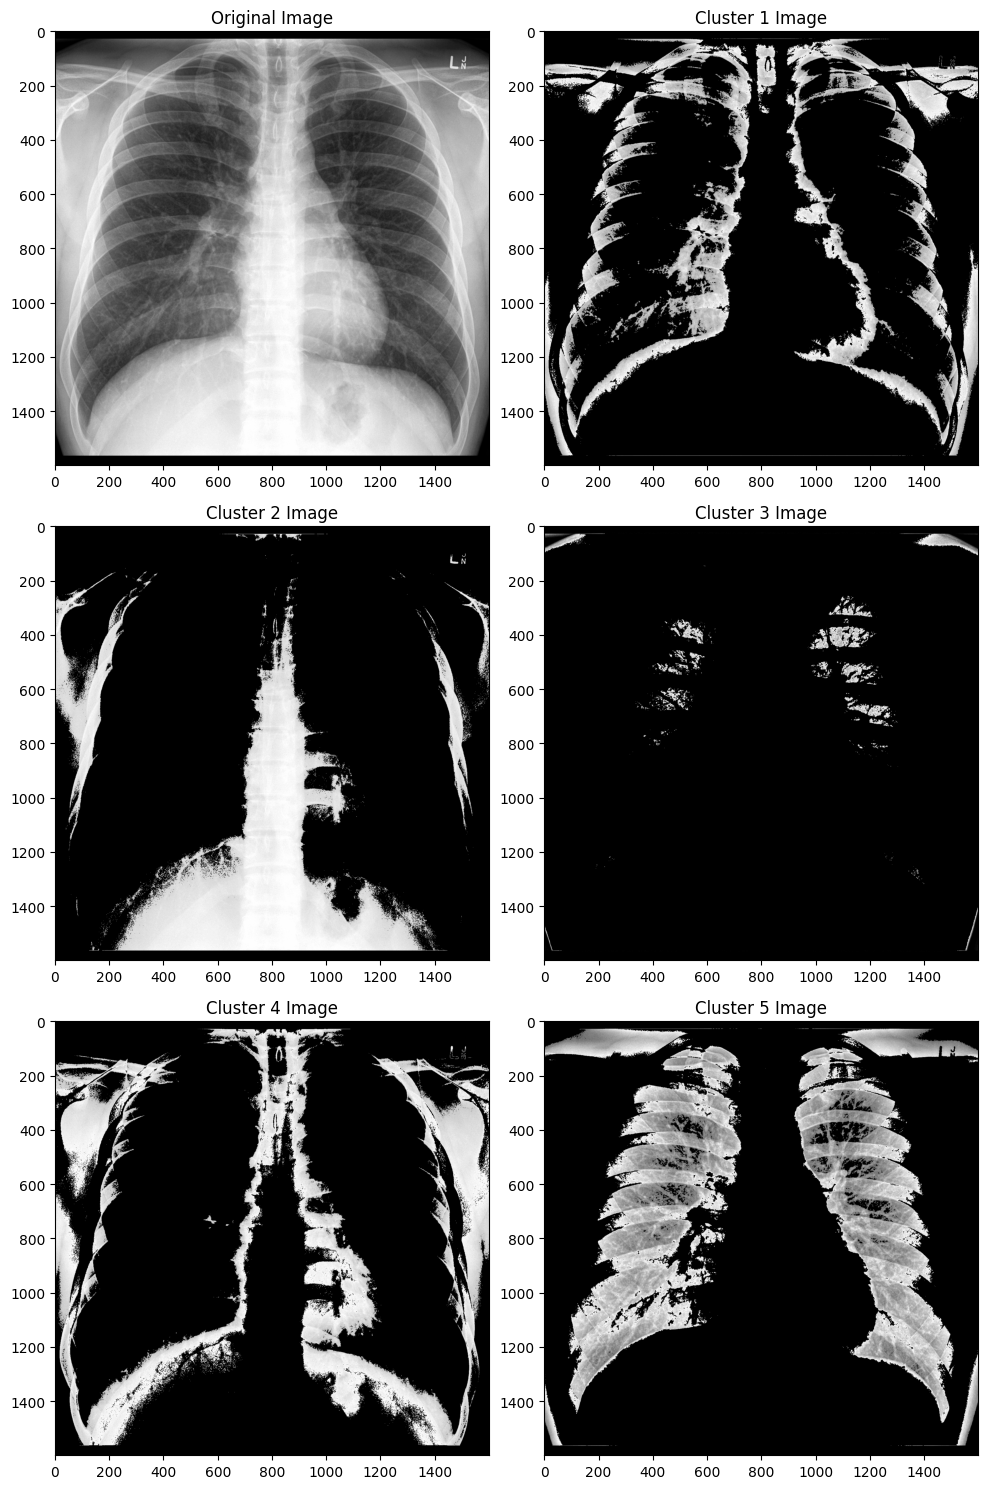

In [11]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math

# Step 1: Load the chest X-ray image
image_path = "normal-frontal-chest-x-ray.jpg"
image = cv2.imread(image_path)

# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Flatten the image
flat_gray_image = gray_image.reshape((-1, 1))

# Step 4: Apply K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(flat_gray_image)
clustered_labels = kmeans.labels_

# Step 5: Reshape the clustered labels back to the original image shape
clustered_image = clustered_labels.reshape(gray_image.shape)

# Step 6: Display the original and clustered images
# Display the original and clustered images in a single column with multiple rows
num_rows = math.ceil((k + 1) / 2)

plt.figure(figsize=(10, num_rows * 5))

# Display the original image in the first position
plt.subplot(num_rows, 2, 1)
plt.imshow(gray_image, cmap="gray")
plt.title("Original Image")

# Initialize plot position
plot_pos = 2

# Display an image for each cluster in subsequent positions
for i in range(k):
    # Create a mask for the current cluster
    mask = clustered_image == i

    # Apply the mask to the grayscale image to isolate the cluster
    cluster_image = np.zeros_like(gray_image)
    cluster_image[mask] = gray_image[mask]

    # Display the image for the current cluster
    plt.subplot(num_rows, 2, plot_pos)
    plt.imshow(cluster_image, cmap="gray")
    plt.title(f"Cluster {i+1} Image")

    # Increment plot position
    plot_pos += 1

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import math

# Load the chest X-ray image
image_path = "normal-frontal-chest-x-ray.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Flatten the image
flat_gray_image = gray_image.reshape((-1, 1))

# Apply DBSCAN clustering
# eps and min_samples need to be adjusted based on your specific dataset and requirements
dbscan = DBSCAN(eps=10, min_samples=100).fit(flat_gray_image)
clustered_labels = dbscan.labels_

# Find the number of clusters (excluding noise if present)
num_clusters = len(set(clustered_labels)) - (1 if -1 in clustered_labels else 0)

# Reshape the clustered labels back to the original image shape
clustered_image = clustered_labels.reshape(gray_image.shape)

# Calculate the number of rows needed for 2 columns, considering the original image
num_rows = math.ceil((num_clusters + 1) / 2)

plt.figure(figsize=(10, num_rows * 5))

# Display the original image in the first position
plt.subplot(num_rows, 2, 1)
plt.imshow(gray_image, cmap="gray")
plt.title("Original Image")

# Initialize plot position
plot_pos = 2

# Display an image for each cluster in subsequent positions
for i in range(num_clusters):
    if i == -1:
        # Skip noise if present
        continue

    # Create a mask for the current cluster
    mask = clustered_image == i

    # Apply the mask to the grayscale image to isolate the cluster
    cluster_image = np.zeros_like(gray_image)
    cluster_image[mask] = gray_image[mask]

    # Display the image for the current cluster
    plt.subplot(num_rows, 2, plot_pos)
    plt.imshow(cluster_image, cmap="gray")
    plt.title(f"Cluster {i+1} Image")

    # Increment plot position
    plot_pos += 1

plt.tight_layout()
plt.show()